In [107]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
#Import and drop utc timezone
weather = pd.read_csv("data/weather.csv")
weather.drop(columns = "timestamp_utc", inplace = True)
weather

,timestamp_cet,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,2007-04-22T21:20:00+02:00,18.9,15.2,1.6,0.7,0.7,321,18.9,973.5,0.0,4.4,3.0,38.0,405.94
1,2007-04-22T21:30:00+02:00,18.1,15.2,1.3,0.8,0.8,346,18.1,973.7,0.0,4.8,3.0,41.0,405.94
2,2007-04-22T21:40:00+02:00,17.7,15.1,0.9,0.2,0.2,4,17.7,973.7,0.0,5.1,3.0,43.0,405.94
3,2007-04-22T21:50:00+02:00,17.6,15.3,0.6,0.1,0.1,235,17.6,973.8,0.0,5.7,3.0,45.0,405.94
4,2007-04-22T22:00:00+02:00,17.4,15.4,0.7,0.3,0.3,178,17.4,973.9,0.0,6.3,3.0,48.0,405.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909575,2024-11-18T15:30:00+01:00,10.9,11.7,4.2,1.7,1.7,213,9.4,968.9,0.0,3.3,54.0,60.0,405.86
909576,2024-11-18T15:40:00+01:00,10.8,11.7,4.5,1.9,1.9,281,9.2,968.9,0.0,3.5,43.0,61.0,405.86
909577,2024-11-18T15:50:00+01:00,10.6,11.7,4.8,1.7,1.7,272,8.9,968.9,0.0,3.5,27.0,62.0,405.86
909578,2024-11-18T16:00:00+01:00,10.5,11.7,4.3,1.1,1.1,274,9.4,968.9,0.0,3.5,31.0,62.0,405.86


In [109]:
#Transform to datetime format
pd.to_datetime(weather["timestamp_cet"])

C:\Users\micha\AppData\Local\Temp\ipykernel_25508\2309803379.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  pd.to_datetime(weather["timestamp_cet"])


0         2007-04-22 21:20:00+02:00
1         2007-04-22 21:30:00+02:00
2         2007-04-22 21:40:00+02:00
3         2007-04-22 21:50:00+02:00
4         2007-04-22 22:00:00+02:00
                    ...            
909575    2024-11-18 15:30:00+01:00
909576    2024-11-18 15:40:00+01:00
909577    2024-11-18 15:50:00+01:00
909578    2024-11-18 16:00:00+01:00
909579    2024-11-18 16:10:00+01:00
Name: timestamp_cet, Length: 909580, dtype: object

In [110]:
#Filter for only 2024 Data and see if there are missing values
weather_filtered = weather.loc[weather["timestamp_cet"] >= "2024-01-01 00:00"]
weather_filtered.isna().sum()



timestamp_cet              0
air_temperature            0
water_temperature          0
wind_gust_max_10min        0
wind_speed_avg_10min       0
wind_force_avg_10min       0
wind_direction             0
windchill                  0
barometric_pressure_qfe    0
precipitation              0
dew_point                  0
global_radiation           0
humidity                   0
water_level                0
dtype: int64

### Deal With Missing Values In Hardbruecke

In [111]:
#Import hardbruecke data to copy date
df = pd.read_csv("data/frequenzen_hardbruecke_2024.csv")
# Transform the smaller dataset to wide format
df_wide = df.pivot_table(
    index="Timestamp", columns= "Name", values=["In", "Out"]).reset_index()
# Display the wide data
df_wide
#We just need TimeStamp and In and Outflow for the Ost-VBZ Total and West-WBZ Total
#Selecting columns that we need 
relevant_columns = [('Timestamp', ''), ('In', 'Ost-VBZ Total'), ('In', 'West-VBZ total')]
df_VBZ = df_wide[relevant_columns]

#Filter for only 2024 Data
df_VBZ[df_VBZ["Timestamp"] >= '2024-01-01 00:00:00']

#Doppel index wegmachen
df_VBZ = df_VBZ.droplevel(level=0, axis=1)
df_VBZ.rename(columns = {'':'Timestamp'}, inplace = True)
df_VBZ


Name,Timestamp,Ost-VBZ Total,West-VBZ total
0,2024-01-16T14:55:00,13.0,20.0
1,2024-01-16T15:00:00,14.0,11.0
2,2024-01-16T15:05:00,29.0,6.0
3,2024-01-16T15:10:00,18.0,9.0
4,2024-01-16T15:15:00,33.0,16.0
...,...,...,...
82616,2024-11-12T08:35:00,62.0,6.0
82617,2024-11-12T08:40:00,76.0,36.0
82618,2024-11-12T08:45:00,70.0,31.0
82619,2024-11-12T08:50:00,35.0,11.0


In [112]:
# Ensure the Timestamp column is a datetime object
df_VBZ['Timestamp'] = pd.to_datetime(df_VBZ['Timestamp'])

# Generate a full range of timestamps from the first to the last timestamp, at 5-minute intervals
full_range = pd.date_range(start=df_VBZ['Timestamp'].min(), end=df_VBZ['Timestamp'].max(), freq='5T')

# Find the missing timestamps by comparing with the existing ones
missing_timestamps = full_range[~full_range.isin(df_VBZ['Timestamp'])]

# Print the missing timestamps
print(missing_timestamps[1099])
missing_timestamps = pd.DataFrame(missing_timestamps)
missing_timestamps.rename(columns = {0: 'Timestamp'}, inplace = True)
missing_timestamps
missing_timestamps

2024-03-18 04:55:00


C:\Users\micha\AppData\Local\Temp\ipykernel_25508\2632921931.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df_VBZ['Timestamp'].min(), end=df_VBZ['Timestamp'].max(), freq='5T')


,Timestamp
0,2024-01-17 00:45:00
1,2024-01-17 01:00:00
2,2024-01-17 01:05:00
3,2024-01-17 01:20:00
4,2024-01-17 01:25:00
...,...
3991,2024-11-12 03:40:00
3992,2024-11-12 03:50:00
3993,2024-11-12 03:55:00
3994,2024-11-12 04:30:00


In [113]:
# Duplicate rows
healed_VBZ = pd.concat([df_VBZ, missing_timestamps], ignore_index=True)

healed_VBZ

# Sort by timestamp to maintain order
healed_VBZ = healed_VBZ.sort_values(by='Timestamp').reset_index(drop=True)


healed_VBZ


,Timestamp,Ost-VBZ Total,West-VBZ total
0,2024-01-16 14:55:00,13.0,20.0
1,2024-01-16 15:00:00,14.0,11.0
2,2024-01-16 15:05:00,29.0,6.0
3,2024-01-16 15:10:00,18.0,9.0
4,2024-01-16 15:15:00,33.0,16.0
...,...,...,...
86612,2024-11-12 08:35:00,62.0,6.0
86613,2024-11-12 08:40:00,76.0,36.0
86614,2024-11-12 08:45:00,70.0,31.0
86615,2024-11-12 08:50:00,35.0,11.0


Timestamp         0
Ost-VBZ Total     0
West-VBZ total    0
dtype: int64


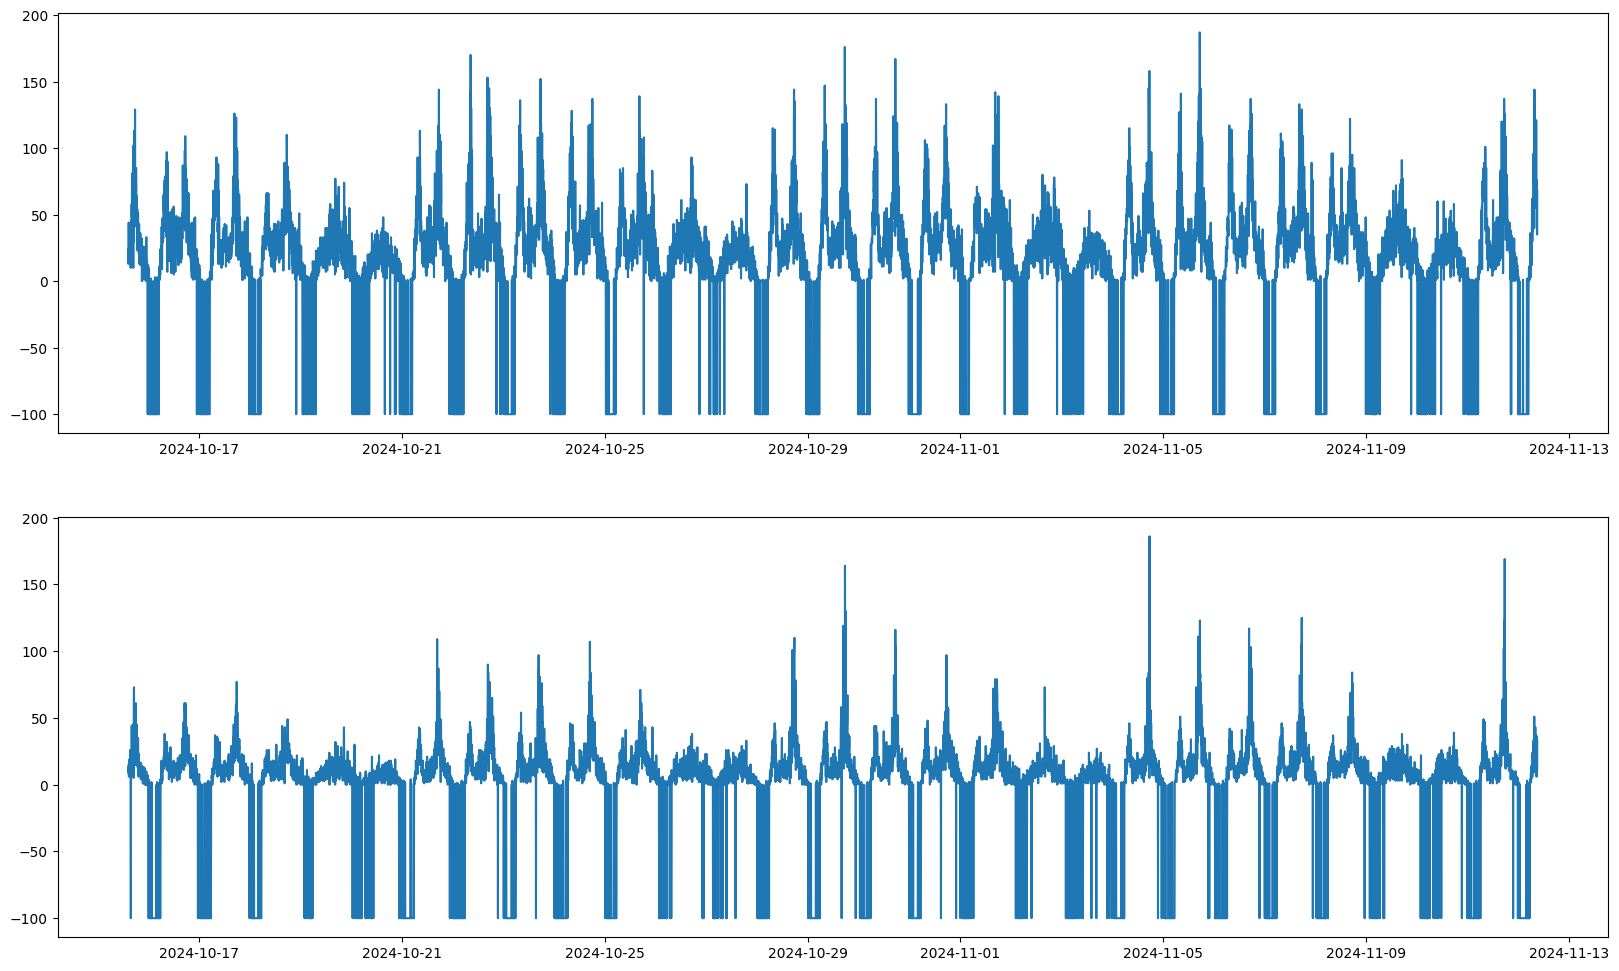

In [114]:
#Observe where missing values are located
healed_VBZ_mv = healed_VBZ.copy() #create a copy to work on
healed_VBZ_mv.fillna(-100, inplace = True)
print(healed_VBZ_mv.isna().sum())

fig, axs = plt.subplots(2,1, figsize = (20, 12))
axs[0].plot(healed_VBZ_mv["Timestamp"].tail(8000), healed_VBZ_mv["Ost-VBZ Total"].tail(8000))
axs[1].plot(healed_VBZ_mv["Timestamp"].tail(8000), healed_VBZ_mv["West-VBZ total"].tail(8000))


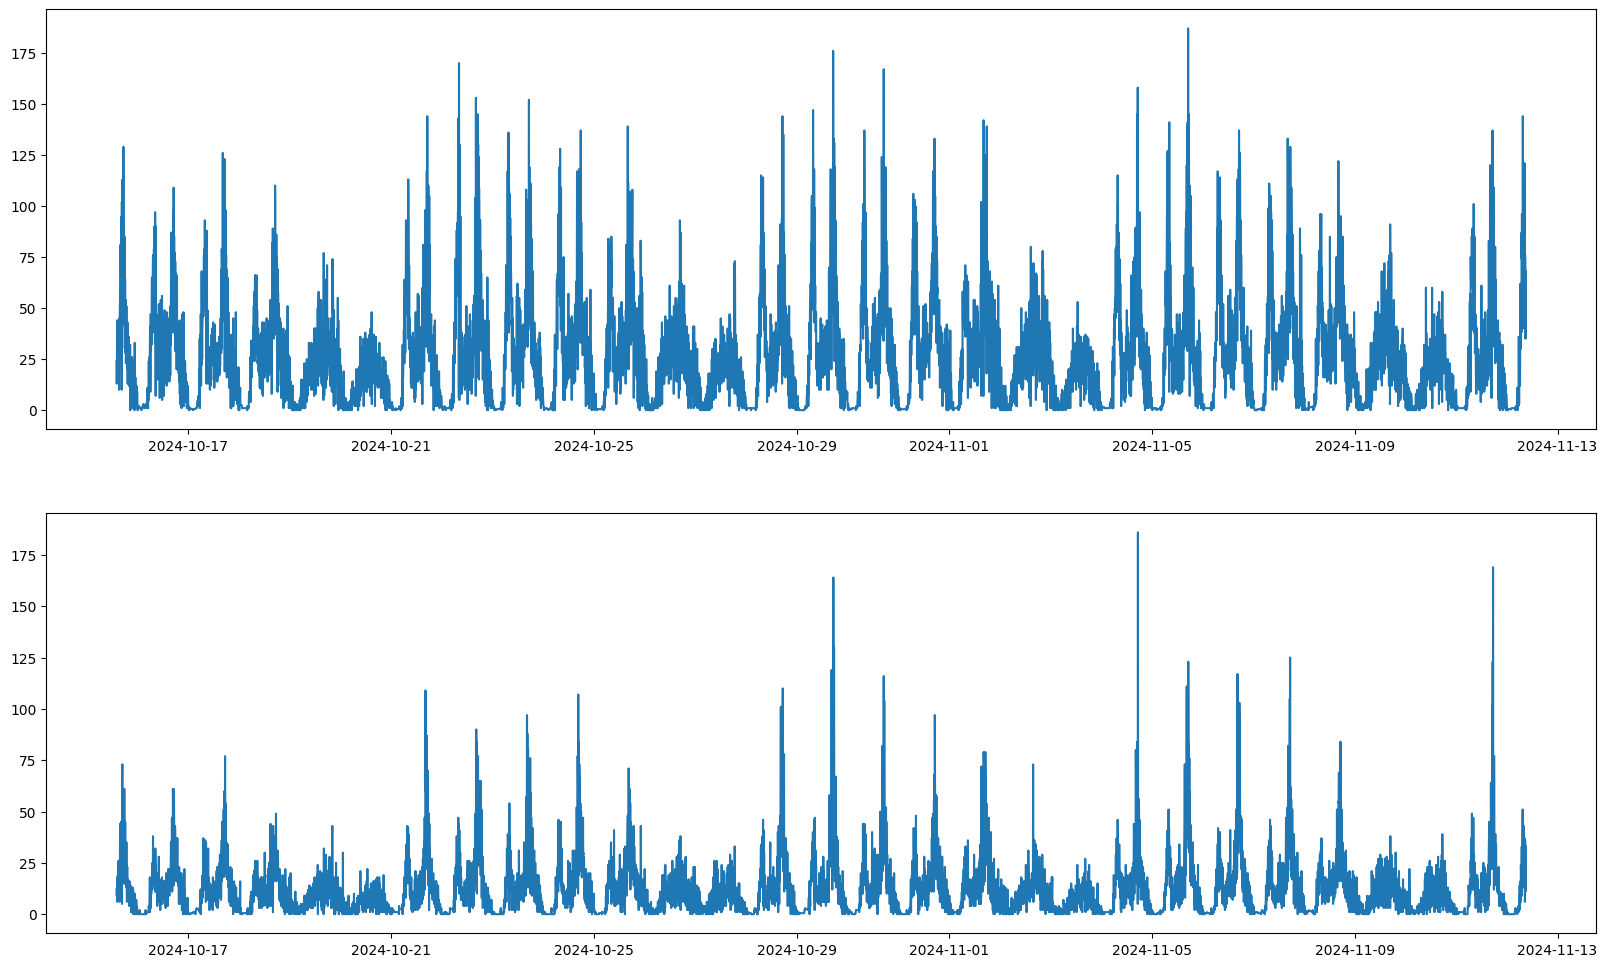

In [115]:
Ost_VBZ_Total_ff = healed_VBZ['Ost-VBZ Total'].ffill()
Ost_VBZ_Total_bf = healed_VBZ['Ost-VBZ Total'].bfill()

West_VBZ_total_ff = healed_VBZ['West-VBZ total'].ffill()
West_VBZ_total_bf = healed_VBZ['West-VBZ total'].bfill()

healed_VBZ['Ost-VBZ Total'] = healed_VBZ['Ost-VBZ Total'].fillna((Ost_VBZ_Total_ff + Ost_VBZ_Total_bf) / 2)
healed_VBZ['West-VBZ total'] = healed_VBZ['West-VBZ total'].fillna((West_VBZ_total_ff + West_VBZ_total_bf) / 2)
#plot to see results
fig, axs = plt.subplots(2,1, figsize = (20, 12))
axs[0].plot(healed_VBZ["Timestamp"].tail(8000), healed_VBZ["Ost-VBZ Total"].tail(8000))
axs[1].plot(healed_VBZ["Timestamp"].tail(8000), healed_VBZ["West-VBZ total"].tail(8000))



### Workday data

In [116]:

# Duplicate rows
duplicated_weather = pd.concat([weather_filtered, weather_filtered])

# Sort by timestamp to maintain order
duplicated_weather = duplicated_weather.sort_values(by='timestamp_cet').reset_index(drop=True)

# Convert 'timestamp_cet' to datetime format
duplicated_weather['timestamp_cet'] = pd.to_datetime(duplicated_weather['timestamp_cet'])

# Add 5 minutes to every second row's timestamp
duplicated_weather.loc[1::2, 'timestamp_cet'] += pd.Timedelta(minutes=5)

# Remove timezone information to make timestamps timezone-naive
duplicated_weather['timestamp_cet'] = duplicated_weather['timestamp_cet']

five_weather = duplicated_weather


# Locate all observations after 16 january to match hardbrücke
five_weather = five_weather.loc[five_weather["timestamp_cet"] > pd.Timestamp("2024-01-16 14:50+01:00")]
five_weather = five_weather.reset_index()
five_weather = five_weather[0:85865]


C:\Users\micha\AppData\Local\Temp\ipykernel_25508\1403500704.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  duplicated_weather['timestamp_cet'] = pd.to_datetime(duplicated_weather['timestamp_cet'])


In [117]:
feiertage = pd.DataFrame({
	"Datum": ["2024-01-01", "2024-01-02", "2024-03-28", "2024-03-29", "2024-04-01", "2024-04-15", "2024-05-01", "2024-05-08", "2024-05-09", "2024-05-10", "2024-05-20", "2024-08-01", "2024-09-09", "2024-12-24", "2024-12-25", "2024-12-26", "2024-12-27", "2024-12-30", "2024-12-31"]
})
feiertage["Datum"] = pd.to_datetime(feiertage["Datum"])
#Add index if holiday or not
feiertage["Feiertag"] = 1
feiertage

,Datum,Feiertag
0,2024-01-01,1
1,2024-01-02,1
2,2024-03-28,1
3,2024-03-29,1
4,2024-04-01,1
5,2024-04-15,1
6,2024-05-01,1
7,2024-05-08,1
8,2024-05-09,1
9,2024-05-10,1


In [118]:
# Erstelle eine Datumsreihe für das Jahr 2024
dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")

# Erstelle einen DataFrame mit Wochentagen
calendar = pd.DataFrame({
    "Datum": dates,
    "Wochentag": dates.day_name()  # Gibt den Wochentag als Namen aus
})

calendar["Datum"] = pd.to_datetime(calendar["Datum"])
pd.DataFrame(calendar)
calendar["Feiertag"] = 0
calendar


,Datum,Wochentag,Feiertag
0,2024-01-01,Monday,0
1,2024-01-02,Tuesday,0
2,2024-01-03,Wednesday,0
3,2024-01-04,Thursday,0
4,2024-01-05,Friday,0
...,...,...,...
361,2024-12-27,Friday,0
362,2024-12-28,Saturday,0
363,2024-12-29,Sunday,0
364,2024-12-30,Monday,0


In [119]:

# Put the data together
calendar2 = np.where(calendar["Datum"].isin(feiertage["Datum"]), 1, 0)
calendar["Feiertag"] = calendar2


In [120]:
# Put the data together
calendar.loc[calendar["Wochentag"].isin(["Saturday", "Sunday"]), "Feiertag"] = 1

In [121]:
calendar

,Datum,Wochentag,Feiertag
0,2024-01-01,Monday,1
1,2024-01-02,Tuesday,1
2,2024-01-03,Wednesday,0
3,2024-01-04,Thursday,0
4,2024-01-05,Friday,0
...,...,...,...
361,2024-12-27,Friday,1
362,2024-12-28,Saturday,1
363,2024-12-29,Sunday,1
364,2024-12-30,Monday,1


In [122]:
#Data Frame with only holiday variable
Feiertag_df = calendar[["Datum", "Feiertag"]]
Feiertag_df


,Datum,Feiertag
0,2024-01-01,1
1,2024-01-02,1
2,2024-01-03,0
3,2024-01-04,0
4,2024-01-05,0
...,...,...
361,2024-12-27,1
362,2024-12-28,1
363,2024-12-29,1
364,2024-12-30,1


In [123]:
#Put holidays and weather data together
five_weather = five_weather.rename(columns = {"timestamp_cet": "Timestamp"})
five_weather

,index,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,4145,2024-01-16 14:55:00+01:00,4.0,5.4,4.1,1.9,1.9,44,1.9,962.5,0.0,-2.4,184.0,63.0,405.79
1,4146,2024-01-16 15:00:00+01:00,3.9,5.5,2.9,1.6,1.6,3,3.0,962.5,0.0,-2.5,137.0,63.0,405.79
2,4147,2024-01-16 15:05:00+01:00,3.9,5.5,2.9,1.6,1.6,3,3.0,962.5,0.0,-2.5,137.0,63.0,405.79
3,4148,2024-01-16 15:10:00+01:00,3.8,5.5,2.8,0.9,0.9,55,3.5,962.4,0.0,-2.6,169.0,63.0,405.79
4,4149,2024-01-16 15:15:00+01:00,3.8,5.5,2.8,0.9,0.9,55,3.5,962.4,0.0,-2.6,169.0,63.0,405.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85860,90005,2024-11-12 08:35:00+01:00,6.1,13.0,4.8,3.2,3.2,39,2.6,977.7,0.0,4.9,13.0,92.0,405.87
85861,90006,2024-11-12 08:40:00+01:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85862,90007,2024-11-12 08:45:00+01:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85863,90008,2024-11-12 08:50:00+01:00,6.1,13.0,5.8,3.8,3.8,45,2.3,977.8,0.0,5.0,29.0,92.0,405.87


In [ ]:
#Deal with time change (summer time happens between observations 21380 and 21381)
# (winter time happens between 81182 and 81183) (look below for further analysis)
five_weather.loc[21379:]
five_weather.loc[81180:]

,index,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
81180,85325,2024-10-27 01:45:00+02:00,11.7,15.1,2.9,1.6,1.6,142,11.5,971.0,0.0,10.6,0.0,93.0,405.97
81181,85326,2024-10-27 01:50:00+02:00,11.6,15.1,1.7,0.9,0.9,61,11.6,971.0,0.0,10.6,0.0,94.0,405.97
81182,85327,2024-10-27 01:55:00+02:00,11.6,15.1,1.7,0.9,0.9,61,11.6,971.0,0.0,10.6,0.0,94.0,405.97
81183,85328,2024-10-27 02:00:00+01:00,11.6,15.1,2.8,1.3,1.3,149,11.6,971.2,0.0,10.6,0.0,94.0,405.97
81184,85329,2024-10-27 02:05:00+01:00,11.6,15.1,2.8,1.3,1.3,149,11.6,971.2,0.0,10.6,0.0,94.0,405.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85860,90005,2024-11-12 08:35:00+01:00,6.1,13.0,4.8,3.2,3.2,39,2.6,977.7,0.0,4.9,13.0,92.0,405.87
85861,90006,2024-11-12 08:40:00+01:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85862,90007,2024-11-12 08:45:00+01:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85863,90008,2024-11-12 08:50:00+01:00,6.1,13.0,5.8,3.8,3.8,45,2.3,977.8,0.0,5.0,29.0,92.0,405.87


In [139]:
#Change time away from utc to normal time
five_weather['Timestamp'] = pd.to_datetime(five_weather['Timestamp'], utc = True)
five_weather = five_weather.copy()
five_weather['Timestamp'] = five_weather['Timestamp'] + pd.Timedelta(hours=1)
five_weather['Timestamp'] = five_weather['Timestamp'].dt.tz_localize(None)
five_weather



,index,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,4145,2024-01-16 14:55:00,4.0,5.4,4.1,1.9,1.9,44,1.9,962.5,0.0,-2.4,184.0,63.0,405.79
1,4146,2024-01-16 15:00:00,3.9,5.5,2.9,1.6,1.6,3,3.0,962.5,0.0,-2.5,137.0,63.0,405.79
2,4147,2024-01-16 15:05:00,3.9,5.5,2.9,1.6,1.6,3,3.0,962.5,0.0,-2.5,137.0,63.0,405.79
3,4148,2024-01-16 15:10:00,3.8,5.5,2.8,0.9,0.9,55,3.5,962.4,0.0,-2.6,169.0,63.0,405.79
4,4149,2024-01-16 15:15:00,3.8,5.5,2.8,0.9,0.9,55,3.5,962.4,0.0,-2.6,169.0,63.0,405.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85860,90005,2024-11-12 08:35:00,6.1,13.0,4.8,3.2,3.2,39,2.6,977.7,0.0,4.9,13.0,92.0,405.87
85861,90006,2024-11-12 08:40:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85862,90007,2024-11-12 08:45:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85863,90008,2024-11-12 08:50:00,6.1,13.0,5.8,3.8,3.8,45,2.3,977.8,0.0,5.0,29.0,92.0,405.87


In [140]:
#So if we  compare the time change before utc was changed to normal time and after, we see that the code already transforms our variables from summer time to winter time 
#at the 31st of march so I dont have to do anything there, lets see also for the 27th of october
#31st of march
five_weather[five_weather["Timestamp"] == "2024-03-31 01:55:00"]
five_weather[21379:]

#27th of october
five_weather[81180:]

,index,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
81180,85325,2024-10-27 00:45:00,11.7,15.1,2.9,1.6,1.6,142,11.5,971.0,0.0,10.6,0.0,93.0,405.97
81181,85326,2024-10-27 00:50:00,11.6,15.1,1.7,0.9,0.9,61,11.6,971.0,0.0,10.6,0.0,94.0,405.97
81182,85327,2024-10-27 00:55:00,11.6,15.1,1.7,0.9,0.9,61,11.6,971.0,0.0,10.6,0.0,94.0,405.97
81183,85328,2024-10-27 02:00:00,11.6,15.1,2.8,1.3,1.3,149,11.6,971.2,0.0,10.6,0.0,94.0,405.97
81184,85329,2024-10-27 02:05:00,11.6,15.1,2.8,1.3,1.3,149,11.6,971.2,0.0,10.6,0.0,94.0,405.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85860,90005,2024-11-12 08:35:00,6.1,13.0,4.8,3.2,3.2,39,2.6,977.7,0.0,4.9,13.0,92.0,405.87
85861,90006,2024-11-12 08:40:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85862,90007,2024-11-12 08:45:00,6.1,13.0,5.1,3.4,3.4,37,2.6,977.8,0.0,5.0,20.0,92.0,405.86
85863,90008,2024-11-12 08:50:00,6.1,13.0,5.8,3.8,3.8,45,2.3,977.8,0.0,5.0,29.0,92.0,405.87


In [18]:
#Drop observations which dont match hardbruecke from weather
five_weather.drop(columns = ["index"], inplace = True)


### Missing values for weather data

In [21]:

# Generate a full range of timestamps from the first to the last timestamp, at 5-minute intervals
full_range = pd.date_range(start=five_weather['Timestamp'].min(), end=five_weather['Timestamp'].max(), freq='5T')

# Find the missing timestamps by comparing with the existing ones
missing_timestamps = full_range[~full_range.isin(five_weather['Timestamp'])]

# Print the missing timestamps

missing_timestamps = pd.DataFrame(missing_timestamps)
missing_timestamps.rename(columns = {0: 'Timestamp'}, inplace = True)
missing_timestamps
missing_timestamps

# Duplicate rows
healed_weather = pd.concat([five_weather, missing_timestamps], ignore_index=True)


# Sort by timestamp to maintain order
healed_weather = healed_weather.sort_values(by='Timestamp').reset_index(drop=True)

#Interpolate missing values
weather_features = healed_weather.columns
weather_features = weather_features[1:14]

for i in weather_features:
    ff = healed_weather[i].ffill()
    bf = healed_weather[i].bfill()
    
    healed_weather[i] = healed_weather[i].fillna((ff + bf)/2)
    healed_weather

C:\Users\micha\AppData\Local\Temp\ipykernel_25508\1387657178.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=five_weather['Timestamp'].min(), end=five_weather['Timestamp'].max(), freq='5T')


In [22]:
#Merge the two dataframes weather and hardbruecke
X = pd.merge(healed_weather, healed_VBZ, on = "Timestamp", how = "inner")
X

,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level,Ost-VBZ Total,West-VBZ total
0,2024-01-16 14:55:00,4.0,5.4,4.1,1.9,1.9,44.0,1.9,962.5,0.0,-2.4,184.0,63.0,405.79,13.0,20.0
1,2024-01-16 15:00:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,-2.5,137.0,63.0,405.79,14.0,11.0
2,2024-01-16 15:05:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,-2.5,137.0,63.0,405.79,29.0,6.0
3,2024-01-16 15:10:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,-2.6,169.0,63.0,405.79,18.0,9.0
4,2024-01-16 15:15:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,-2.6,169.0,63.0,405.79,33.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86612,2024-11-12 08:35:00,6.1,13.0,4.8,3.2,3.2,39.0,2.6,977.7,0.0,4.9,13.0,92.0,405.87,62.0,6.0
86613,2024-11-12 08:40:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,5.0,20.0,92.0,405.86,76.0,36.0
86614,2024-11-12 08:45:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,5.0,20.0,92.0,405.86,70.0,31.0
86615,2024-11-12 08:50:00,6.1,13.0,5.8,3.8,3.8,45.0,2.3,977.8,0.0,5.0,29.0,92.0,405.87,35.0,11.0


In [23]:
X

,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level,Ost-VBZ Total,West-VBZ total
0,2024-01-16 14:55:00,4.0,5.4,4.1,1.9,1.9,44.0,1.9,962.5,0.0,-2.4,184.0,63.0,405.79,13.0,20.0
1,2024-01-16 15:00:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,-2.5,137.0,63.0,405.79,14.0,11.0
2,2024-01-16 15:05:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,-2.5,137.0,63.0,405.79,29.0,6.0
3,2024-01-16 15:10:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,-2.6,169.0,63.0,405.79,18.0,9.0
4,2024-01-16 15:15:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,-2.6,169.0,63.0,405.79,33.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86612,2024-11-12 08:35:00,6.1,13.0,4.8,3.2,3.2,39.0,2.6,977.7,0.0,4.9,13.0,92.0,405.87,62.0,6.0
86613,2024-11-12 08:40:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,5.0,20.0,92.0,405.86,76.0,36.0
86614,2024-11-12 08:45:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,5.0,20.0,92.0,405.86,70.0,31.0
86615,2024-11-12 08:50:00,6.1,13.0,5.8,3.8,3.8,45.0,2.3,977.8,0.0,5.0,29.0,92.0,405.87,35.0,11.0


### Add the t- variable 

In [24]:

X.sort_values(by = "Timestamp",ascending=False, inplace = True)

#Add new variable for ost to shift values back
X["t-1 ost"] = X["Ost-VBZ Total"].shift(-1)
X["t-2 ost"] = X["Ost-VBZ Total"].shift(-2)
X["t-3 ost"] = X["Ost-VBZ Total"].shift(-3)
X["t-4 ost"] = X["Ost-VBZ Total"].shift(-4)
X["t-5 ost"] = X["Ost-VBZ Total"].shift(-5)

#Add new variable for west to shift values back
X["t-1 west"] = X["West-VBZ total"].shift(-1)
X["t-2 west"] = X["West-VBZ total"].shift(-2)
X["t-3 west"] = X["West-VBZ total"].shift(-3)
X["t-4 west"] = X["West-VBZ total"].shift(-4)
X["t-5 west"] = X["West-VBZ total"].shift(-5)

X.sort_values(by = "Timestamp",ascending=True, inplace = True)
X

,Timestamp,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,...,t-1 ost,t-2 ost,t-3 ost,t-4 ost,t-5 ost,t-1 west,t-2 west,t-3 west,t-4 west,t-5 west
0,2024-01-16 14:55:00,4.0,5.4,4.1,1.9,1.9,44.0,1.9,962.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-16 15:00:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,...,13.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
2,2024-01-16 15:05:00,3.9,5.5,2.9,1.6,1.6,3.0,3.0,962.5,0.0,...,14.0,13.0,NaN,NaN,NaN,11.0,20.0,NaN,NaN,NaN
3,2024-01-16 15:10:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,...,29.0,14.0,13.0,NaN,NaN,6.0,11.0,20.0,NaN,NaN
4,2024-01-16 15:15:00,3.8,5.5,2.8,0.9,0.9,55.0,3.5,962.4,0.0,...,18.0,29.0,14.0,13.0,NaN,9.0,6.0,11.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86612,2024-11-12 08:35:00,6.1,13.0,4.8,3.2,3.2,39.0,2.6,977.7,0.0,...,55.0,121.0,61.0,113.0,101.0,31.0,37.0,28.0,23.0,27.0
86613,2024-11-12 08:40:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,...,62.0,55.0,121.0,61.0,113.0,6.0,31.0,37.0,28.0,23.0
86614,2024-11-12 08:45:00,6.1,13.0,5.1,3.4,3.4,37.0,2.6,977.8,0.0,...,76.0,62.0,55.0,121.0,61.0,36.0,6.0,31.0,37.0,28.0
86615,2024-11-12 08:50:00,6.1,13.0,5.8,3.8,3.8,45.0,2.3,977.8,0.0,...,70.0,76.0,62.0,55.0,121.0,31.0,36.0,6.0,31.0,37.0
